<a href="https://colab.research.google.com/github/jeev-data-wiz/Sales_analysis/blob/changes/Audio_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Sales trends of 2022**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving New sales order list 2022.XLSX to New sales order list 2022.XLSX


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df22=pd.read_excel('/content/New sales order list 2022.XLSX')

In [4]:
df22.head(5)

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695615,10,...,4.0,0.0,400.00,1600.00,AED,1.0,2023-02-01,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695613,10,...,2.0,0.0,910.00,1820.00,AED,1.0,2023-01-05,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695611,10,...,1.0,0.0,329.99,329.99,AED,1.0,2022-12-31,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695610,10,...,2.0,0.0,98.80,197.60,AED,1.0,2023-01-04,EL01,EL01,EL01
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695608,10,...,1.0,0.0,32.50,32.50,AED,1.0,2022-12-31,SU10,EL01,EL01


In [5]:
df22.columns

Index(['Division', 'Division Name', 'Sales Organization',
       'Sales Organization Name', 'Distribution Channel',
       'Distribution Channel Name', 'Sales Document Type',
       'Sales Document Type.1', 'Sales Document', 'Sales Document Item',
       'Document Date', 'Sold-To Party', 'Sold-To Party Name', 'Material',
       'Item Type', 'Sched.line category', 'Sales Unit',
       'Order Quantity (Schedule Line)', 'Delivered Quantity SU',
       'Pending Quantity SU', 'Net Price', 'Net Value (Item)',
       'Document Currency', 'Exchange Rate', 'Delivery Date',
       'Storage Location', 'Shipping Point/Receiving Pt', 'Plant'],
      dtype='object')

In [6]:
df22.shape

(45075, 28)

In [7]:
df22.rename(columns={'Net Value (Item)':'Sales'}, inplace=True)
df22.rename(columns={'Document Date':'Date'}, inplace=True)

In [8]:
df22['Sales']=df22['Sales']*df22['Exchange Rate']

#This converts the Sales to a uniform currency of Emirati Dirham

In [9]:
df22.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Date                              0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Sales                             0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [10]:
# #for col in df.columns:
#     if 'A' in col:
#         del df[col]
# may be useful

In [11]:
df22['Date'] = pd.to_datetime(df22['Date'])
df22['year'] = df22['Date'].dt.year
df22['month'] = df22['Date'].dt.month
df22['day'] = df22['Date'].dt.day
df22['weekday'] = df22['Date'].dt.weekday
df22['weekday'] = np.where(df22.weekday == 0, 7, df22.weekday)

In [12]:
sales_by_distchname = df22.groupby(['Distribution Channel Name','month'])['Sales'].sum().unstack()

<Figure size 1200x600 with 0 Axes>

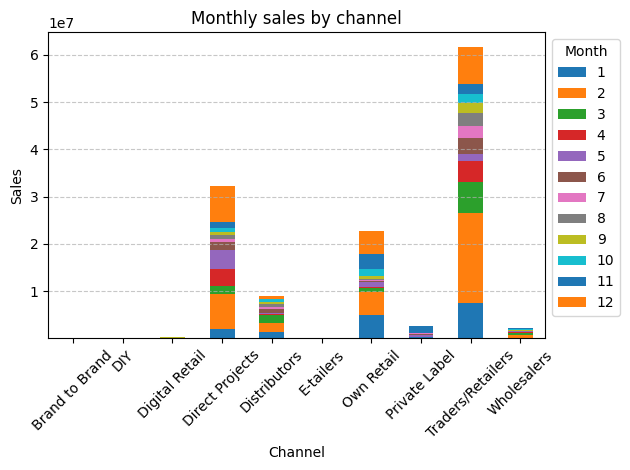

In [13]:
plt.figure(figsize=(12,6))
sales_by_distchname.plot(kind='bar',stacked=True)
plt.title("Monthly sales by channel")
plt.xlabel("Channel")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Month",bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

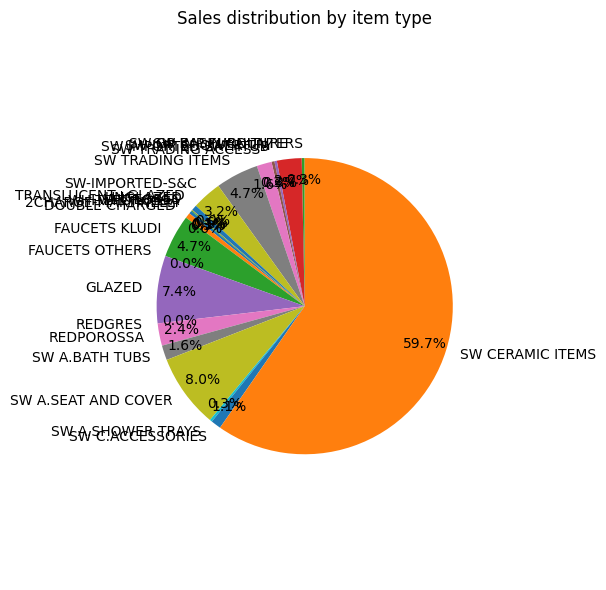

In [14]:
sales_by_itemtype=df22.groupby('Item Type')['Sales'].sum().reset_index()
plt.figure(figsize=(6,6))
item_typ=sales_by_itemtype['Item Type']
sales_val=sales_by_itemtype['Sales']
plt.pie(sales_val, labels=item_typ ,autopct='%1.1f%%',startangle=140,labeldistance=1.1,pctdistance=0.85)
plt.title('Sales distribution by item type')
plt.axis('equal')
plt.tight_layout()
plt.show()


<ipython-input-15-8bc467301461>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 100x100 with 0 Axes>

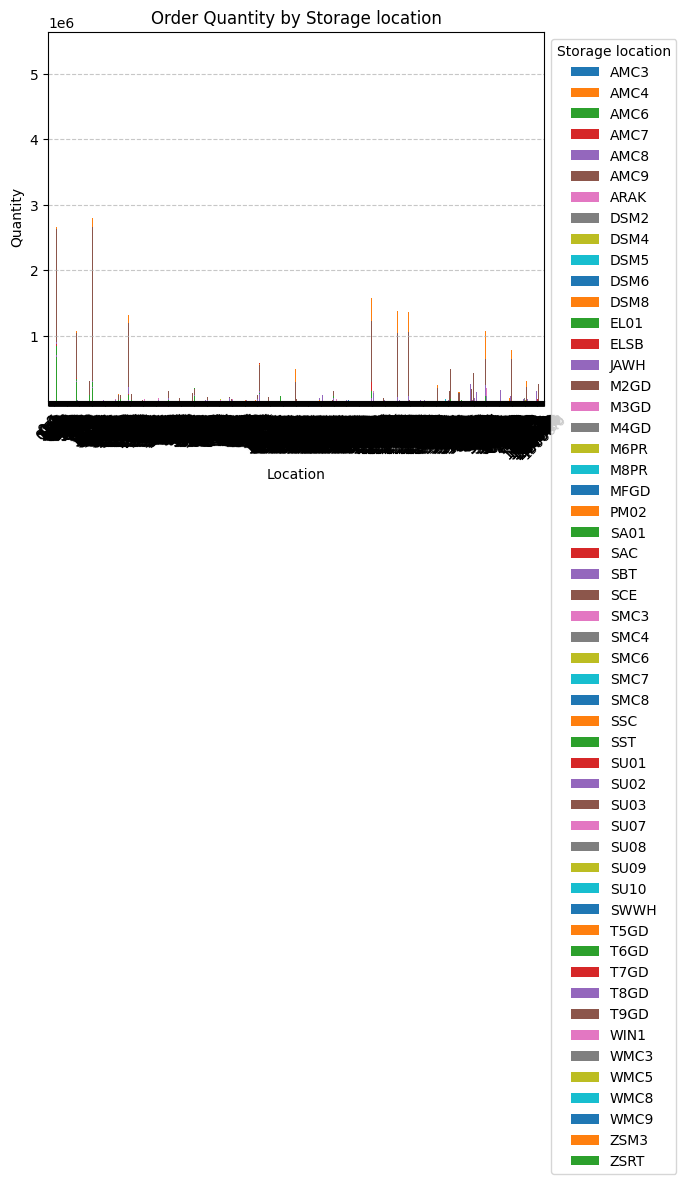

In [15]:
sales_by_storage_location=df22.groupby(['Order Quantity (Schedule Line)','Storage Location'])['Sales'].sum().unstack()
plt.figure(figsize=(1,1))
sales_by_storage_location.plot(kind='bar',stacked=True)
plt.title("Order Quantity by Storage location")
plt.xlabel("Location")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.legend(title="Storage location",bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

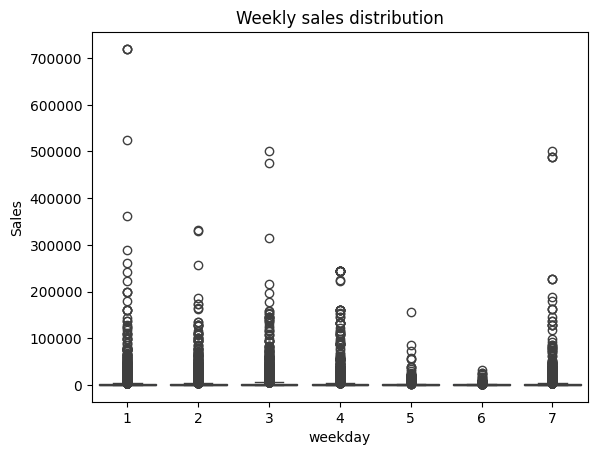

In [16]:
plot = sns.boxplot(x='weekday', y='Sales', data=df22)
_ = plot.set(title='Weekly sales distribution')

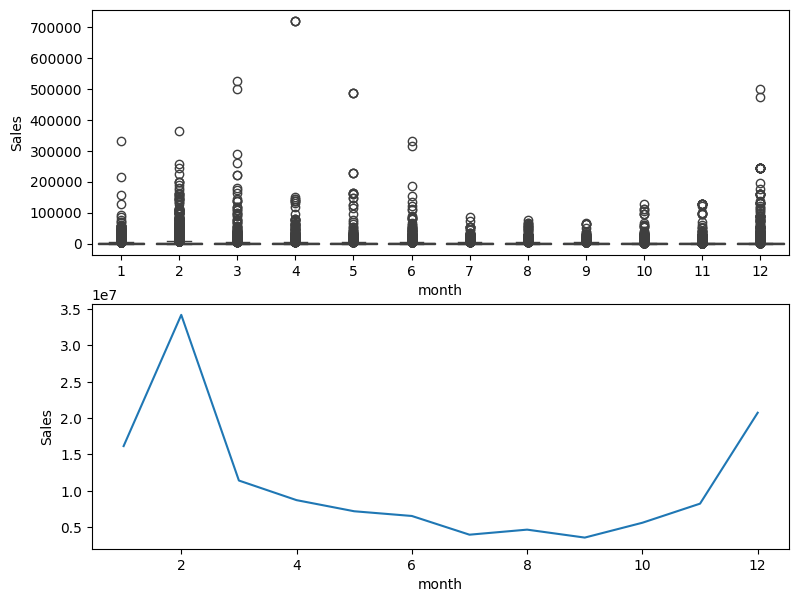

In [17]:
monthly_agg = df22.groupby('month')['Sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sns.boxplot(x='month', y='Sales', data=df22, ax=axs[0])
_ = sns.lineplot(x='month', y='Sales', data=monthly_agg, ax=axs[1])

The trend of Sales of 2022

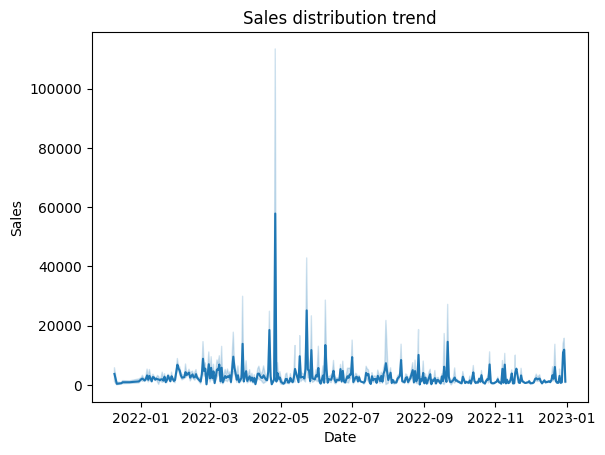

In [18]:
plot = sns.lineplot(x='Date', y='Sales', data=df22)
_ = plot.set(title='Sales distribution trend')

The Focus will now shift to Time series forecasting. Several models can be used Namely


*   Linear Regression
*   XG Booster

*   ARIMA
*   Seasonal Naives





# Linear Regressor

<ipython-input-20-6b66a0257c26>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])
<ipython-input-20-6b66a0257c26>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Year'] = sales_data.index.year
<ipython-input-20-6b66a0257c26>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Root Mean Squared Error on Validation Set: 6841.754701437914


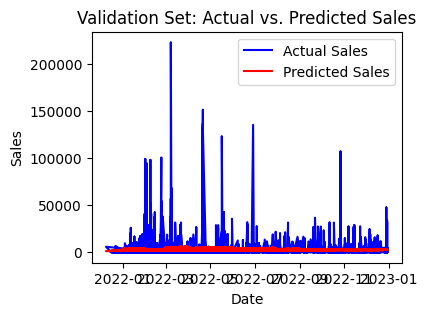

Root Mean Squared Error on Testing Set: 11169.285782000334


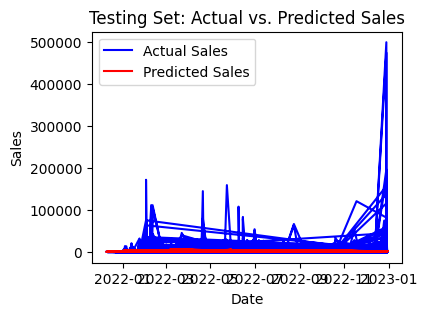

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the sales dataset
sales_data = df22[['Date','Sales']]

#according to the correlation matrix the other features seem to not be so relevant

# Preprocess the data
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)

# Feature Engineering
sales_data['Year'] = sales_data.index.year
sales_data['Month'] = sales_data.index.month
sales_data['Day'] = sales_data.index.day
sales_data['DayOfWeek'] = sales_data.index.dayofweek
sales_data['DayOfYear'] = sales_data.index.dayofyear

# Split the data into training, validation, and testing sets
X = sales_data[['Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear']]
y = sales_data['Sales']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
rmse_valid = np.sqrt(mse_valid)
print(f"Root Mean Squared Error on Validation Set: {rmse_valid}")

# Plot predicted sales vs. actual sales for validation set
plt.figure(figsize=(4, 3))
plt.plot(X_valid.index, y_valid, label='Actual Sales', color='blue')
plt.plot(X_valid.index, y_valid_pred, label='Predicted Sales', color='red')
plt.title('Validation Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model on the testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error on Testing Set: {rmse_test}")

# Plot predicted sales vs. actual sales for testing set
plt.figure(figsize=(4, 3))
plt.plot(X_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(X_test.index, y_test_pred, label='Predicted Sales', color='red')
plt.title('Testing Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

It is evident that the regressor is not a very reliable model.

# XG Booster

In [ ]:
import xgboost as xgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


# Preprocess the data
train_size = int(len(df22) * 0.8)
train_data = df22[:train_size]
test_data = df22[train_size:]

X = np.array(train_data['Sales']).reshape(-1, 1)
y = np.array(train_data['Sales'].shift(-1)).reshape(-1, 1)

# Decompose the time series into seasonal, trend, and residual components
decomposition = seasonal_decompose(train_data['Sales'], model='multiplicative', period=12)

# Extract the seasonal component
seasonal_component = decomposition.seasonal.values.reshape(-1, 1)

# Adjust the input features by removing the seasonal component
X_adjusted = X - seasonal_component

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6)
xgb_model.fit(X_adjusted, y)

# Evaluate the performance of the model
X_test = np.array(test_data['sales']).reshape(-1, 1)
y_test = np.array(test_data['sales'].shift(-1)).reshape(-1, 1)

X_test_adjusted = X_test - decomposition.seasonal.values[-len(X_test):, np.newaxis]

y_pred = xgb_model.predict(X_test_adjusted)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Make predictions on future sales
#future_sales = np.array([[3000], [3200], [3400], [3600], [3800]]).reshape(-1, 1)
# future_predictions = xgb_model.predict(future_sales - decomposition.seasonal.values[-5:, np.newaxis])
# print(f'Future predictions: {future_predictions}')

In [ ]:
# random forest regressor
# predict order quan
# predict delivery date